In [1]:
# from ultralytics import YOLO

In [1]:
from utils.helper import img_to_encoding

In [4]:
import json
import requests
import numpy as np
from PIL import Image

from PIL import Image
import matplotlib.pyplot as plt

def display_image_with_title(image_path, title):
  """
  Displays a Pillow image with a title using Matplotlib.

  Args:
      image_path: Path to the image file.
      title: The title to be displayed.
  """

  # Open the image with Pillow
  img = Image.open(image_path)

  # Convert image to RGB format (required for Matplotlib)
  img_rgb = img.convert("RGB")

  # Create a figure for plotting
  fig, ax = plt.subplots()

  # Display the image
  ax.imshow(img_rgb)
  ax.axis("off")  # Hide axes for cleaner presentation

  # Add title as text annotation
  plt.title(title, fontsize=16, ha="center")  # Center-aligned title

  # Display the plot
  plt.show()

In [13]:
img=Image.open("./images/download.jpeg")

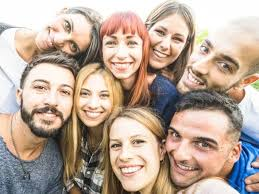

In [14]:
img

In [8]:
# Convert the image to a 3D array (RGB format)
image_array = np.array(img)

# Convert the array to a list (to be JSON serializable)
image_list = image_array.tolist()

# Prepare JSON payload
payload = {
           'image': image_list, 
           'identity':"email"
        }
json_payload = json.dumps(payload)

# Send HTTP POST request
url = "http://127.0.0.1:5000/imageVerification"  # Replace with your API endpoint
response = requests.get(url, json=json_payload)



ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /imageVerification (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001F88FE40310>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
response.text

In [9]:
# Convert the image to a 3D array (RGB format)
image_array = np.array(img)

# Convert the array to a list (to be JSON serializable)
image_list = image_array.tolist()

# Prepare JSON payload
payload = {
           'image': image_list, 
           'identity':"andrew"
        }
json_payload = json.dumps(payload)

# Send HTTP POST request
url = "http://127.0.0.1:5000/embeddingCreation"  # Replace with your API endpoint
response = requests.post(url, json=json_payload)

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /embeddingCreation (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001F896970310>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [7]:
import os
start_dir=".."

In [8]:
os.getcwd()

'c:\\Users\\user\\Desktop\\miniProject\\webApps\\arduinoBackend\\AiFiles'

In [9]:


for root, dirs, files in os.walk(start_dir):
    if 'encoding.json' in files:
        encoding_json_path = os.path.join(root, 'encoding.json')
        with open(encoding_json_path, 'r') as f:
            data = json.load(f)

In [10]:
data.keys()

dict_keys(['charbeldaher34@gmail.com', 'a@gmail.com', 'joycesaab@gmail.com', 'asdasd'])

In [ ]:
encoding=img_to_encoding(img)

In [ ]:
for root, dirs, files in os.walk(start_dir):
    if 'encoding.json' in files:
        print("sd")
        encoding_json_path = os.path.join(root, 'encoding.json')
        with open(encoding_json_path, 'w') as f:
          json.dump(data,f)

In [ ]:
data.keys()

In [ ]:
data['andrew']=encoding.tolist()

In [ ]:
data.keys()

In [ ]:
a=data['andrew']

In [ ]:
np.array(a).shape

In [10]:
from PIL import Image
from numpy import asarray
import numpy as np
import cv2
import json
import os
from ultralytics import YOLO
from keras_facenet import FaceNet
embedder=FaceNet()
for root, dirs, files in os.walk(".."):
    if 'best_float32.tflite' in files:
        model_path = os.path.join(root, 'best_float32.tflite')
        tflite_model =YOLO(model_path,task='detect')
        

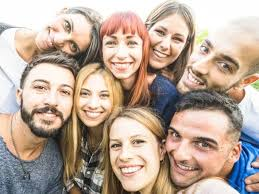

In [15]:
img

In [ ]:
def image_to_faces(img):
    results = tflite_model(img)
    # Assuming you have the image as a NumPy array and a list of results as described
    cropped_images = []
    for result in results:
        boxes = result.boxes.cpu().numpy()  # Get bounding boxes as NumPy array
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]  # Extract coordinates as integers
            cropped_box = (x1, y1, x2, y2)
            # Crop the image
            cropped_img = img.crop(cropped_box) # Crop the image using the bounding box coordinates
        
            cropped_images.append(cropped_img)
    return cropped_images

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def image_to_faces_with_boxes(img):
  results = tflite_model(img)
  # Assuming you have the image as a NumPy array and a list of results as described

  fig, ax = plt.subplots()  # Create a figure and an axis for plotting

  # Plot the original image
  ax.imshow(img)

  for result in results:
    boxes = result.boxes.cpu().numpy()  # Get bounding boxes as NumPy array
    for box in boxes:
      x1, y1, x2, y2 = box.xyxy[0]  # Extract coordinates as integers

      # Create a rectangle patch for the bounding box
      box_patch = patches.Rectangle(
          xy=(x1, y1), width=x2 - x1, height=y2 - y1, color='red', fill=False, linewidth=2
      )

      # Add the rectangle patch to the plot
      ax.add_patch(box_patch)

  # Set axis limits to match the image size (optional)
  ax.set_xlim(0, np.array(img).shape[1])
  save_path="./"
  ax.set_ylim(np.array(img).shape[0], 0)  # Inverted for matplotlib convention
  if save_path is not None:
    plt.savefig(save_path)
  # Show the plot with the image and bounding boxes
  plt.show()
  
  return results  # You can still return the cropped images if needed


In [24]:
np.array(img).shape

(194, 259, 3)


0: 640x640 6 faces, 756.2ms
Speed: 9.8ms preprocess, 756.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


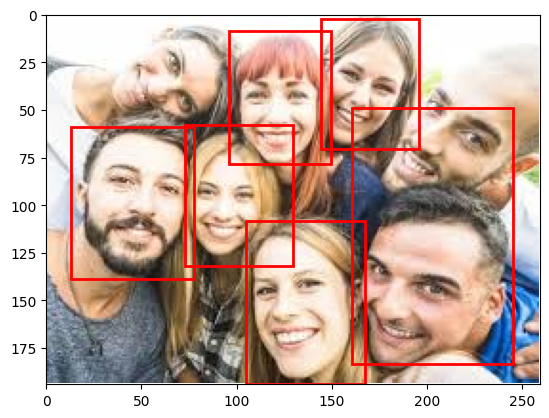

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'face'}
 obb: None
 orig_img: array([[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        ...,
 
        [[155, 135, 118],
         [143, 123, 106],
         [136, 116,  99],
         ...,
         [ 94,  84,  96],
         [ 86,  82,  94],
         [ 81,  76,  91]],
 
        [[133, 113,  96],
         [141, 121, 104],
         [136, 116,  99],
         ...,
         [ 84,  44, 

In [25]:
image_to_faces_with_boxes(img)

In [26]:
# Load the image
image_paths = ["./AiFiles/testingPhotos/a.jpeg","./AiFiles/testingPhotos/b.jpeg","./AiFiles/testingPhotos/c.jpeg"]

for image_path in image_paths:
    # Replace with the path to your image
    image = Image.open(image_path)
    
    # Convert the image to a 3D array (RGB format)
    image_array = np.array(image)
    
    # Convert the array to a list (to be JSON serializable)
    image_list = image_array.tolist()
    
    # Prepare JSON payload
    payload = {
               'image': image_list, 
               'identity':"daher"
            }
    json_payload = json.dumps(payload)
    
    # Send HTTP POST request
    url = "http://127.0.0.1:5000/imageVerification"  # Replace with your API endpoint
    response = requests.get(url, json=json_payload)
    
    if response.status_code == 200:
        display_image_with_title(image_path,response.text )

        
        print(response.text)
    else:
        print("Error:", response.status_code)

FileNotFoundError: [Errno 2] No such file or directory: './AiFiles/testingPhotos/a.jpeg'

In [ ]:
import os
import json
for root, dirs, files in os.walk("."):
    if 'encoding.json' in files:
        print("sd")
        encoding_json_path = os.path.join(root, 'encoding.json')
        with open(encoding_json_path, 'r') as f:
          data=json.load(f)

In [ ]:
data.keys()

IMage to encoding testing

In [ ]:
def img_to_encoding(image):
    # Check if the image has four layers (RGBA)
    if image.mode == "RGBA":
        # Convert the image to RGBA mode if it's not already
        image = image.convert("RGBA")
        # Split the image into individual channels
        r, g, b, a = image.split()
        # Merge the RGB channels (discard the alpha channel)
        image = Image.merge("RGB", (r, g, b))
    face_array=np.asarray(image)
    
    if face_array.dtype == np.int32:
        face_array = np.clip(face_array, 0, 255).astype(np.uint8) 
    face_array = cv2.resize(face_array, dsize=(640, 640), interpolation=cv2.INTER_AREA)
    try:
        embedding = embedder.extract(face_array, threshold=0.80)[0]['embedding']
    except Exception as e:
        # Code to handle any error
        print(f"An error occurred: {e}")
        print("\nErrow with the following image:",image)
    return embedding / np.linalg.norm(embedding, ord=2)

In [ ]:
from PIL import Image
from numpy import asarray
import numpy as np
import cv2
import json
import os
from ultralytics import YOLO
from keras_facenet import FaceNet

In [ ]:
img_to_encoding(img)

In [ ]:
image=img

In [ ]:
if image.mode == "RGBA":
       # Convert the image to RGBA mode if it's not already
       image = image.convert("RGBA")
       # Split the image into individual channels
       r, g, b, a = image.split()
       # Merge the RGB channels (discard the alpha channel)
       image = Image.merge("RGB", (r, g, b))

In [ ]:
face_array=np.asarray(image)


In [ ]:
if face_array.dtype == np.int32:
    face_array = np.clip(face_array, 0, 255).astype(np.uint8) 
face_array = cv2.resize(face_array, dsize=(640, 640), interpolation=cv2.INTER_AREA)

In [ ]:
embedder=FaceNet()


In [ ]:
try:
    embedding = embedder.extract(face_array, threshold=0.80)[0]['embedding']
except Exception as e:
    # Code to handle any error
    print(f"An error occurred: {e}")
    print("\nErrow with the following image:",image)


In [ ]:
embedding

embedding Creation endpoint testing



In [1]:
import json
import requests
import numpy as np
from PIL import Image

In [2]:
img=Image.open("./images/daher/cropped_151_1.jpg")

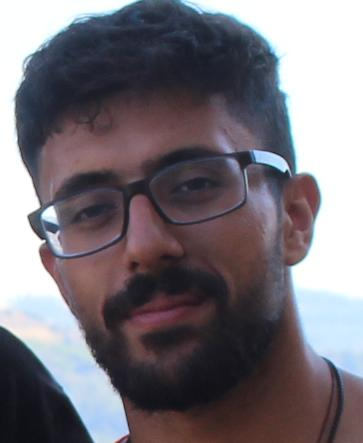

In [3]:
img

In [4]:
img=Image.open("./images/daher/cropped_151_1.jpg")
# Convert the image to a 3D array (RGB format)
image_array = np.array(img)
# Convert the array to a list (to be JSON serializable)
image_list = image_array.tolist()

# Prepare JSON payload
payload = {
           'image': image_list, 
           'identity':"charbeldaher34@gmail.com"
        }
json_payload = json.dumps(payload)

# Send HTTP POST request
url = "http://127.0.0.1:5000/embeddingCreation"  # Replace with your API endpoint
response = requests.post(url, json=json_payload)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [ ]:
response.text